<a href="https://colab.research.google.com/github/IaaC/MACT21.22_Digital_tools_Big_Data_part_3/blob/main/session_5/MaCT_Introduction_Colab_and_GeoDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Geopandas and Google Colab</center></h1>





In noteboook builds upon the existing geopandas tutorial part and looks for an alternative to use geopandas and colab in a single resource. 

![IAAC](https://pbs.twimg.com/profile_images/1105059874826792961/r3HHyWWm_400x400.png)

# Digital Tools and Big Data

## [Master in City & Technology - MaCT](https://iaac.net/educational-programmes/masters-programmes/master-in-city-technology/) 


Edited by: Diego Pajarito

Let us install first some libraries

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

## 1. Reading Geographic data
Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use: 

```
read_file(path/to/file)

```


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px


# Connect to gDrive folder



Step 1: integrate your colab script with gDrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Step 2: create a shortcut with the desired data source

You might have access to a shared folder called ["Big Data 3 class"](https://drive.google.com/drive/folders/1IWVl6A9eHpsUlzjGJr2-RZCCykf1IrP9?usp=sharing)

Once you have access, you need to create a shortcut. That will ensure that the files are available in the following path:

In [ ]:
!ls -lh '/content/gdrive/MyDrive/Big Data 3 class/Intersection_name.geojson'

-rw------- 1 root root 414M Jun  8 14:31 '/content/gdrive/MyDrive/Big Data 3 class/Intersection_name.geojson'


In [ ]:
inter = gpd.read_file('/content/gdrive/MyDrive/Big Data 3 class/Intersection_name.geojson')

In [ ]:
block = gpd.read_file('/content/gdrive/MyDrive/Big Data 3 class/barcelona blocks.geojson')

To have a quick look at the file loaded we can use the head function

inter.head()

In [ ]:
block.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,GEOCODI,REF_CADAST,DISTRICTE,CONVENIENC,ATRIBUTS,PRINCIPAL,DATA,EXPEDIENT,super_sa,geometry
0,01,Grup - I,0106,Parcel·les cadastrals,010601,Parcel·lari,01060101,Illa,0106010103,Polígon d'illa,...,12103,None,01,S,None,None,20171219000000,None,NaN,"MULTIPOLYGON (((431112.558 4580899.442, 431109..."
1,01,Grup - I,0106,Parcel·les cadastrals,010601,Parcel·lari,01060101,Illa,0106010103,Polígon d'illa,...,11111,None,01,S,None,None,20171219000000,None,NaN,"MULTIPOLYGON (((431003.765 4580883.103, 431006..."
2,01,Grup - I,0106,Parcel·les cadastrals,010601,Parcel·lari,01060101,Illa,0106010103,Polígon d'illa,...,11119,None,01,S,None,None,20171219000000,None,NaN,"MULTIPOLYGON (((431027.696 4580968.911, 431037..."
3,01,Grup - I,0106,Parcel·les cadastrals,010601,Parcel·lari,01060101,Illa,0106010103,Polígon d'illa,...,11121,None,01,S,None,None,20171219000000,None,NaN,"MULTIPOLYGON (((431060.995 4581069.733, 431065..."
4,01,Grup - I,0106,Parcel·les cadastrals,010601,Parcel·lari,01060101,Illa,0106010103,Polígon d'illa,...,09095,None,01,S,None,None,20171219000000,None,NaN,"MULTIPOLYGON (((430870.064 4580829.424, 430894..."


# Finding differences in altitudes

To compare buildings within the same city block we need to perform spatial operations as follows:

Step 1: Find the citi block that contains the building

In [ ]:
for index, building in inter.head().iterrows():
  cb = block[block.intersects(building.geometry)]
  print(cb.CODI_ILLA)

1117    20611
Name: CODI_ILLA, dtype: object
1117    20611
Name: CODI_ILLA, dtype: object
1129    20630
Name: CODI_ILLA, dtype: object
1129    20630
Name: CODI_ILLA, dtype: object
1129    20630
Name: CODI_ILLA, dtype: object


In [ ]:
# add NEIGHBORS column
inter["NEIGHBORS"] = None
bld_neigh = gpd.GeoDataFrame(columns=inter.columns)
#for index, building in inter.sample(n=15, random_state=1).iterrows():   
for index, building in inter.sample(n=2000, random_state=1).iterrows():   
  # print(building.gml_id)
  # get 'disjoint' buildings
  try:
    neighbors = inter[~inter.geometry.disjoint(building.geometry)]

    for i, n in neighbors.iterrows():
      if building.height - n.height > 3:
        #print('Yes - ID: ' + n.gml_id)
        bld_neigh = bld_neigh.append(building)
        break
  except:
    print('Geometry ommited:' + building.gml_id)



  # add names of neighbors as NEIGHBORS value
  ##inter.at[index, "NEIGHBORS"] = ", ".join(neighbors)
  ##print("--------------")
print('Done with %s buildings identified: ' % str(bld_neigh.size))

TopologyException: side location conflict at 431617.049 4586095.9400000004. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.1763101DF3816D


TopologyException: side location conflict at 430305.59649999999 4580749.3214999996. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.0309519DF3800G


TopologyException: side location conflict at 432326.23550000001 4589456.3899999997. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.2497803DF3829E


TopologyException: side location conflict at 429122.27600000001 4586192.409. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.9264104DF2896C


TopologyException: side location conflict at 431145.85149999999 4581282.6359999999. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.1215925DF3811E


TopologyException: side location conflict at 431456.51549999998 4586985.8224999998. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.1572819DF3817B


TopologyException: side location conflict at 429500.99349999998 4584474.7635000004. This can occur if the input geometry is invalid.


Geometry ommited:ES.SDGC.BU.9547809DF2894F
Done with 35055 buildings identified: 


In [ ]:
bld_neigh.to_file('/content/gdrive/MyDrive/Big Data 3 class/Buildings_selected.geojson', driver='GeoJSON')


# Initial plots 

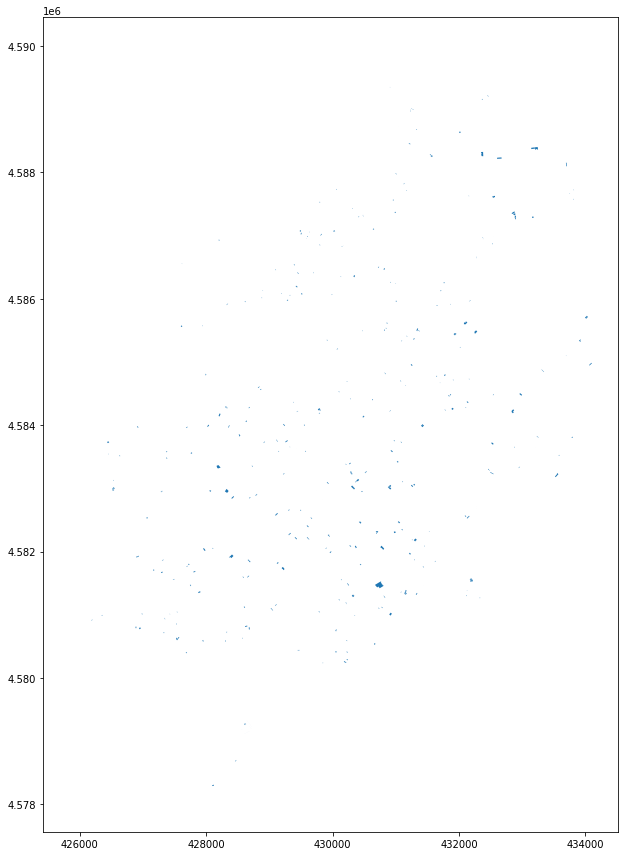

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
bld_neigh.plot(ax=ax)
plt.tight_layout()
plt.show()

## 2. Coordinate systems and Projections

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS  in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let us check them.

In [ ]:
# Data
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((117.7036079039552 4.163414542001791...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-69.51008875199994 -17.506588197999...


In [ ]:
# CRS
countries.crs == cities.crs

True

In [ ]:
countries.crs

{'init': 'epsg:4326'}

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [ ]:
# Look at the geometry column: decimal degrees
countries.geometry[:5]

0    (POLYGON ((117.7036079039552 4.163414542001791...
1    (POLYGON ((117.7036079039552 4.163414542001791...
2    (POLYGON ((-69.51008875199994 -17.506588197999...
3    (POLYGON ((-69.51008875199994 -17.506588197999...
4    (POLYGON ((-69.51008875199994 -17.506588197999...
Name: geometry, dtype: object

In [ ]:
# Project the data into Mercator Projection epsg=3395
countries_projected = countries.to_crs({'init': 'epsg:3395'})

# See the geometry column of the projected countries
countries_projected['geometry'][:5]

0    (POLYGON ((13102705.69639943 460777.6522179524...
1    (POLYGON ((13102705.69639943 460777.6522179524...
2    (POLYGON ((-7737827.684867887 -1967028.7849201...
3    (POLYGON ((-7737827.684867887 -1967028.7849201...
4    (POLYGON ((-7737827.684867887 -1967028.7849201...
Name: geometry, dtype: object

Due to the projection, the geometry is no longer in lat/lon style. It is easier to understand the difference in maps. Let us plot both the original countries and the projected countries.

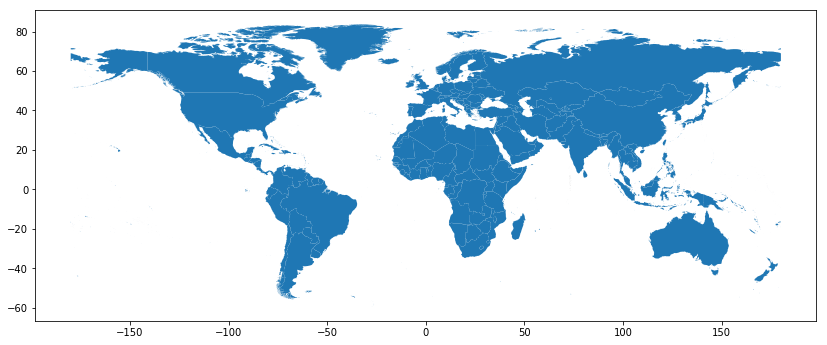

In [ ]:
# Let us plot both unprojected and projected countries
countries.plot(figsize=(14,12));
plt.savefig("wgs84.png")

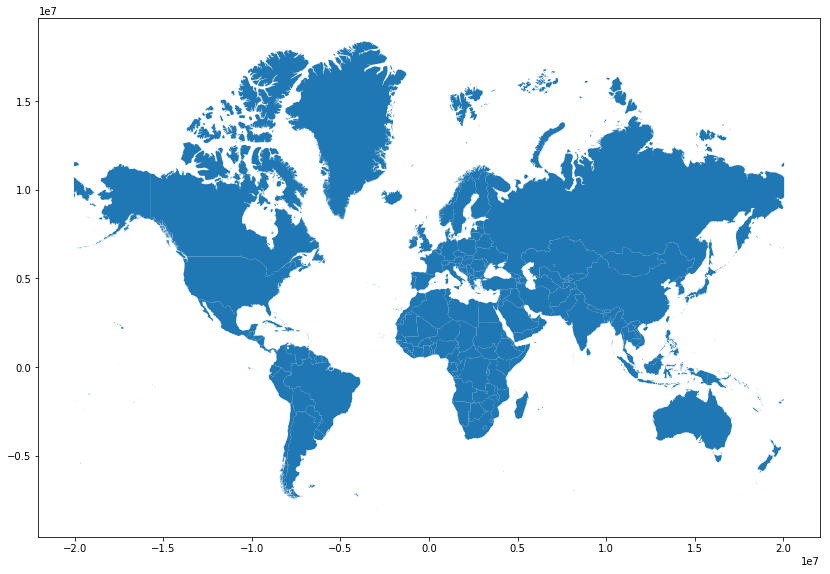

In [ ]:
countries_projected.plot(figsize=(14,12));
plt.savefig("mercator.png")

Notice the different scales of x and y in both maps. If you try to overlay the projected data with unprojected data, then your data will not align properly. Let us see if we can plot cities on the top of projected countries. Remember we have not projected the cities.

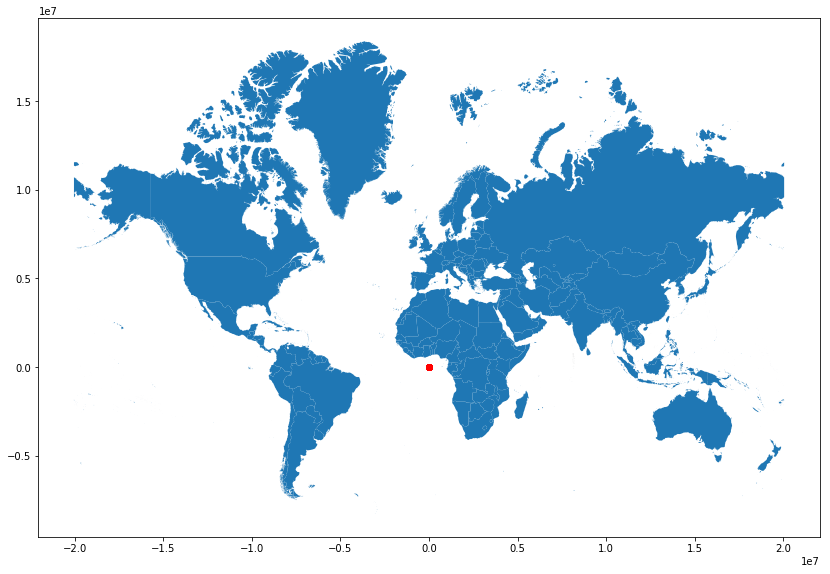

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
countries_projected.plot(ax=ax)
# Cities are still in WGS84
cities.plot(ax=ax, color='red'); 
plt.savefig('overlay_unproj.png')

<div class="alert alert-block alert-success">
       Exercise 2.1: Convert the cities data into EPSG:3395 and plot cities on top of countries_projected
</div>

## 3.Write Geographice Data 
We can easily save any new data created to our local disk. This is helpful when you want to access that file in another time without carrying out the same operations again. Let us save our projected countries to our disk space. Remember we have projected it. So in case we need it another time, let us save it.

Geopandas has:

```
to_file(path/to/file + extension)

```

In [ ]:
# Data
countries_projected.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,(POLYGON ((13102705.69639943 460777.6522179524...
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,(POLYGON ((-7737827.684867887 -1967028.7849201...


In [ ]:

#CRS
countries_projected.crs

{'init': 'epsg:3395'}

In [ ]:
# Save projected countries 
shp = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(shp)

<div class="a">
       Exercise 3.1: Save the projected cities file you created in exercise 2.1 into a file
</div>

# END